In [ ]:
!pip install torchsummary

In [3]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets,transforms,models
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image

In [4]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Setup train and testing paths
train_dir = "/content/drive/MyDrive/Colab Notebooks/data/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/data/test"
pred_dir="/content/drive/MyDrive/Colab Notebooks/data/preq"

train_dir, test_dir

Mounted at /content/drive


('/content/drive/MyDrive/Colab Notebooks/data/train',
 '/content/drive/MyDrive/Colab Notebooks/data/test')

In [6]:
data_transform = transforms.Compose([
  # Resize our images to 299x299
  transforms.Resize(299),
  # Turn the image into a torch.Tensor
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 2647
     Root location: /content/drive/MyDrive/Colab Notebooks/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=299, interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 660
     Root location: /content/drive/MyDrive/Colab Notebooks/data/test
     StandardTransform
 Transform: Compose(
                Resize(size=299, interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [7]:
class_names = train_data.classes
class_names

['benign', 'malignant']

In [8]:
batch_size = 32
training_data = DataLoader(train_data,batch_size=batch_size,drop_last=True,shuffle=True,num_workers=2)
validation_data = DataLoader(test_data, batch_size =batch_size, drop_last=True,shuffle=True,num_workers=2)


In [9]:
print("DataLoaders: ", {training_data, validation_data})
print("Length of training_data: ",{len(training_data)} ,"batches of ",{batch_size})
print("Length of validation_data : ",{len(validation_data)}," batches of ",{batch_size})

DataLoaders:  {<torch.utils.data.dataloader.DataLoader object at 0x7f37cd8f9db0>, <torch.utils.data.dataloader.DataLoader object at 0x7f37cd8f9870>}
Length of training_data:  {82} batches of  {32}
Length of validation_data :  {20}  batches of  {32}


torch.Size([3, 299, 299])
0
Class :  benign


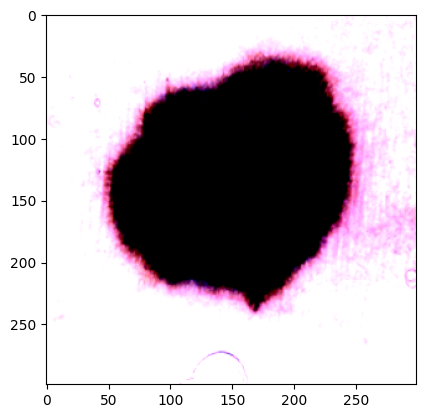

In [10]:
#Image trial 1

im,label=train_data[1000]
print(im.shape)
print("===================")
print(label)
plt.imshow(im.permute(1,2,0).cpu())
print("Class : ",class_names[label])


Class :  benign


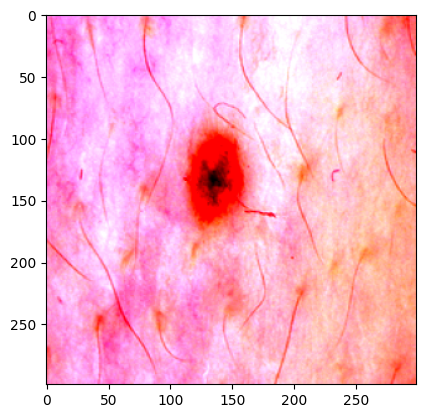

In [11]:
#Image trial 2

im,label=train_data[550]
plt.imshow(im.permute(1,2,0).cpu())
print("Class : ",class_names[label])

Class :  malignant


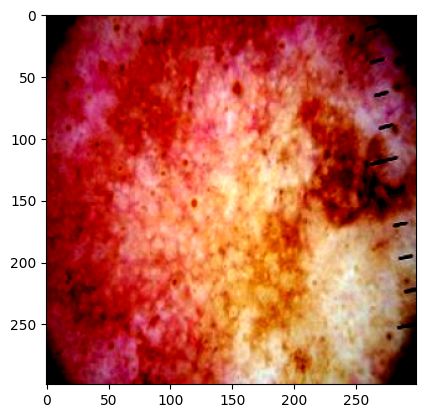

In [12]:
#Image trial 3

im,label=train_data[1900]
plt.imshow(im.permute(1,2,0).cpu())
print("Class : ",class_names[label])

**1.   IMPLEMENTING TRANSFER LEARNING USING A PRE-TRAINED INCEPTION V3
     ARCHITECTIRE.**

**2.   BUILDING THE INCEPTION-C3 NETWORK FROM SCRATCH IS AVOIDED DUE TO   
     PRESENCE OF LARGE NUMBER OF LAYERS**

**3.   BUILDING SUCH MODEL FROM SCRATCH, I WILL COVER IT LATER**

In [13]:
model=models.inception_v3(pretrained=True)
model.parameters


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 118MB/s]


<bound method Module.parameters of Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Mixed_5b): InceptionA(
    (branch1x1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch5x5_1): BasicConv2d(
      (conv): Conv2d(192, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch5x5_2): BasicConv2d(
      (conv): Conv2d(48, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch3x3dbl_1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch3x3dbl_2): BasicConv2d(
      (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch3x3dbl_3): BasicConv2d(
      (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch_pool): BasicConv2d(
      (conv): Conv2d(192, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (Mixed_5c): InceptionA(
    (branch1x1): BasicConv2d(
      (conv): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch5x5_1): BasicConv2d(
      (conv): Conv2d(256, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch5x5_2): BasicConv2d(
      (conv): Conv2d(48, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch3x3dbl_1): BasicConv2d(
      (conv): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch3x3dbl_2): BasicConv2d(
      (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch3x3dbl_3): BasicConv2d(
      (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

**DEFINING THE MODEL FUNCTION**

In [14]:
def get_model():
  model=models.inception_v3(pretrained=True)
  for param in model.parameters():
    param.requires_grad=False #freeze the parameters and changing only the below layers

  model.avgpool=nn.AdaptiveAvgPool2d(output_size=(1,1))
  #model.dropout=nn.Dropout(p=0.2)
  model.fc=nn.Sequential(nn.Flatten(),
                            nn.Linear(2048,128),
                            nn.ReLU(),
                            nn.Dropout(0.2),
                            nn.Linear(128,6))
  model.AuxLogits.conv0 = nn.Conv2d(768, 128, kernel_size=1)
  model.AuxLogits.conv1 = nn.Conv2d(128, 768, kernel_size=5)
  model.aux_logits = False
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
  return model.to(device), loss_fn, optimizer

In [15]:
from torchsummary import summary

input_shape=(3,300,300)
summary(model.to(device),input_shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

In [16]:
#Creating the Utlity function to get the Losses and Accuracies for Train and Validation Dataset

def train_batch(x, y, model, opt, loss_fn):
    model.train()     #setting the model to train
    output = model(x)
#     print("type of output - {type(output)}")
    batch_loss = loss_fn(output, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

**Initialize and Train the model**

In [17]:
model,loss_fn,optimizer=get_model()

**Calculating the Overall Training Model and Testing Data Accuracy**

In [24]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

#no. of epochs is 3

for epoch in range(10):
    print('EPOCH : ',epoch)
    train_epoch_losses, train_epoch_accuracies = [], []

    for ix, batch in enumerate(iter(training_data)):
        x, y = batch
        x, y= x.to(device), y.to(device)
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    #print('Epoch:',epoch,'Train Loss:',train_epoch_loss)
    print('Train Accuracy:',train_epoch_accuracy)

    for ix, batch in enumerate(iter(validation_data)):
        x, y = batch
        x, y= x.to(device), y.to(device)
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
        val_epoch_accuracy = np.mean(val_is_correct)
    #print('Epoch:',epoch,'Validation Loss:',validation_loss)
    print('Validation Accuracy:',val_epoch_accuracy)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

EPOCH :  0
Train Accuracy: 0.8532774390243902
Validation Accuracy: 0.875
EPOCH :  1
Train Accuracy: 0.8513719512195121
Validation Accuracy: 0.78125
EPOCH :  2
Train Accuracy: 0.8555640243902439
Validation Accuracy: 0.8125
EPOCH :  3
Train Accuracy: 0.8666158536585366
Validation Accuracy: 0.875
EPOCH :  4
Train Accuracy: 0.8624237804878049
Validation Accuracy: 0.75
EPOCH :  5
Train Accuracy: 0.8692835365853658
Validation Accuracy: 0.84375
EPOCH :  6
Train Accuracy: 0.8639481707317073
Validation Accuracy: 0.875
EPOCH :  7
Train Accuracy: 0.8666158536585366
Validation Accuracy: 0.875
EPOCH :  8
Train Accuracy: 0.8742378048780488
Validation Accuracy: 0.84375
EPOCH :  9
Train Accuracy: 0.8772865853658537
Validation Accuracy: 0.9375


**Now, using Inception-v3 model to classify the image**

In [25]:
#defining the function to predict the image

from torch.autograd import Variable
from PIL import Image

def pred_class(img):
  #transform the image
  img=data_transform(img)
  #change the input format from (3,300,300) to (1,3,300,300) using the unsqueeze function
  #before prediction, image must be in cuda()
  img_usq=img.unsqueeze(0)
  v_img=Variable(img_usq).to(device)
  out=model(v_img)
  # convert image to numpy format in cpu and snatching max prediction score class index
  index = out.data.cpu().numpy().argmax()
  return index

**Fetching the files to impose the prediction upon**

In [26]:
#Lets get the location of all the prediction files
pred_files = [os.path.join(pred_dir, f) for f in os.listdir(pred_dir)]    #files to store predicted data
pred_files[:10]   #display first 10 of them

['/content/drive/MyDrive/Colab Notebooks/data/preq/1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/11.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/105.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/119.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/127.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/16.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/205.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/147.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/161.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/preq/61.jpg']

**Finally, Prediction of images from our Model**

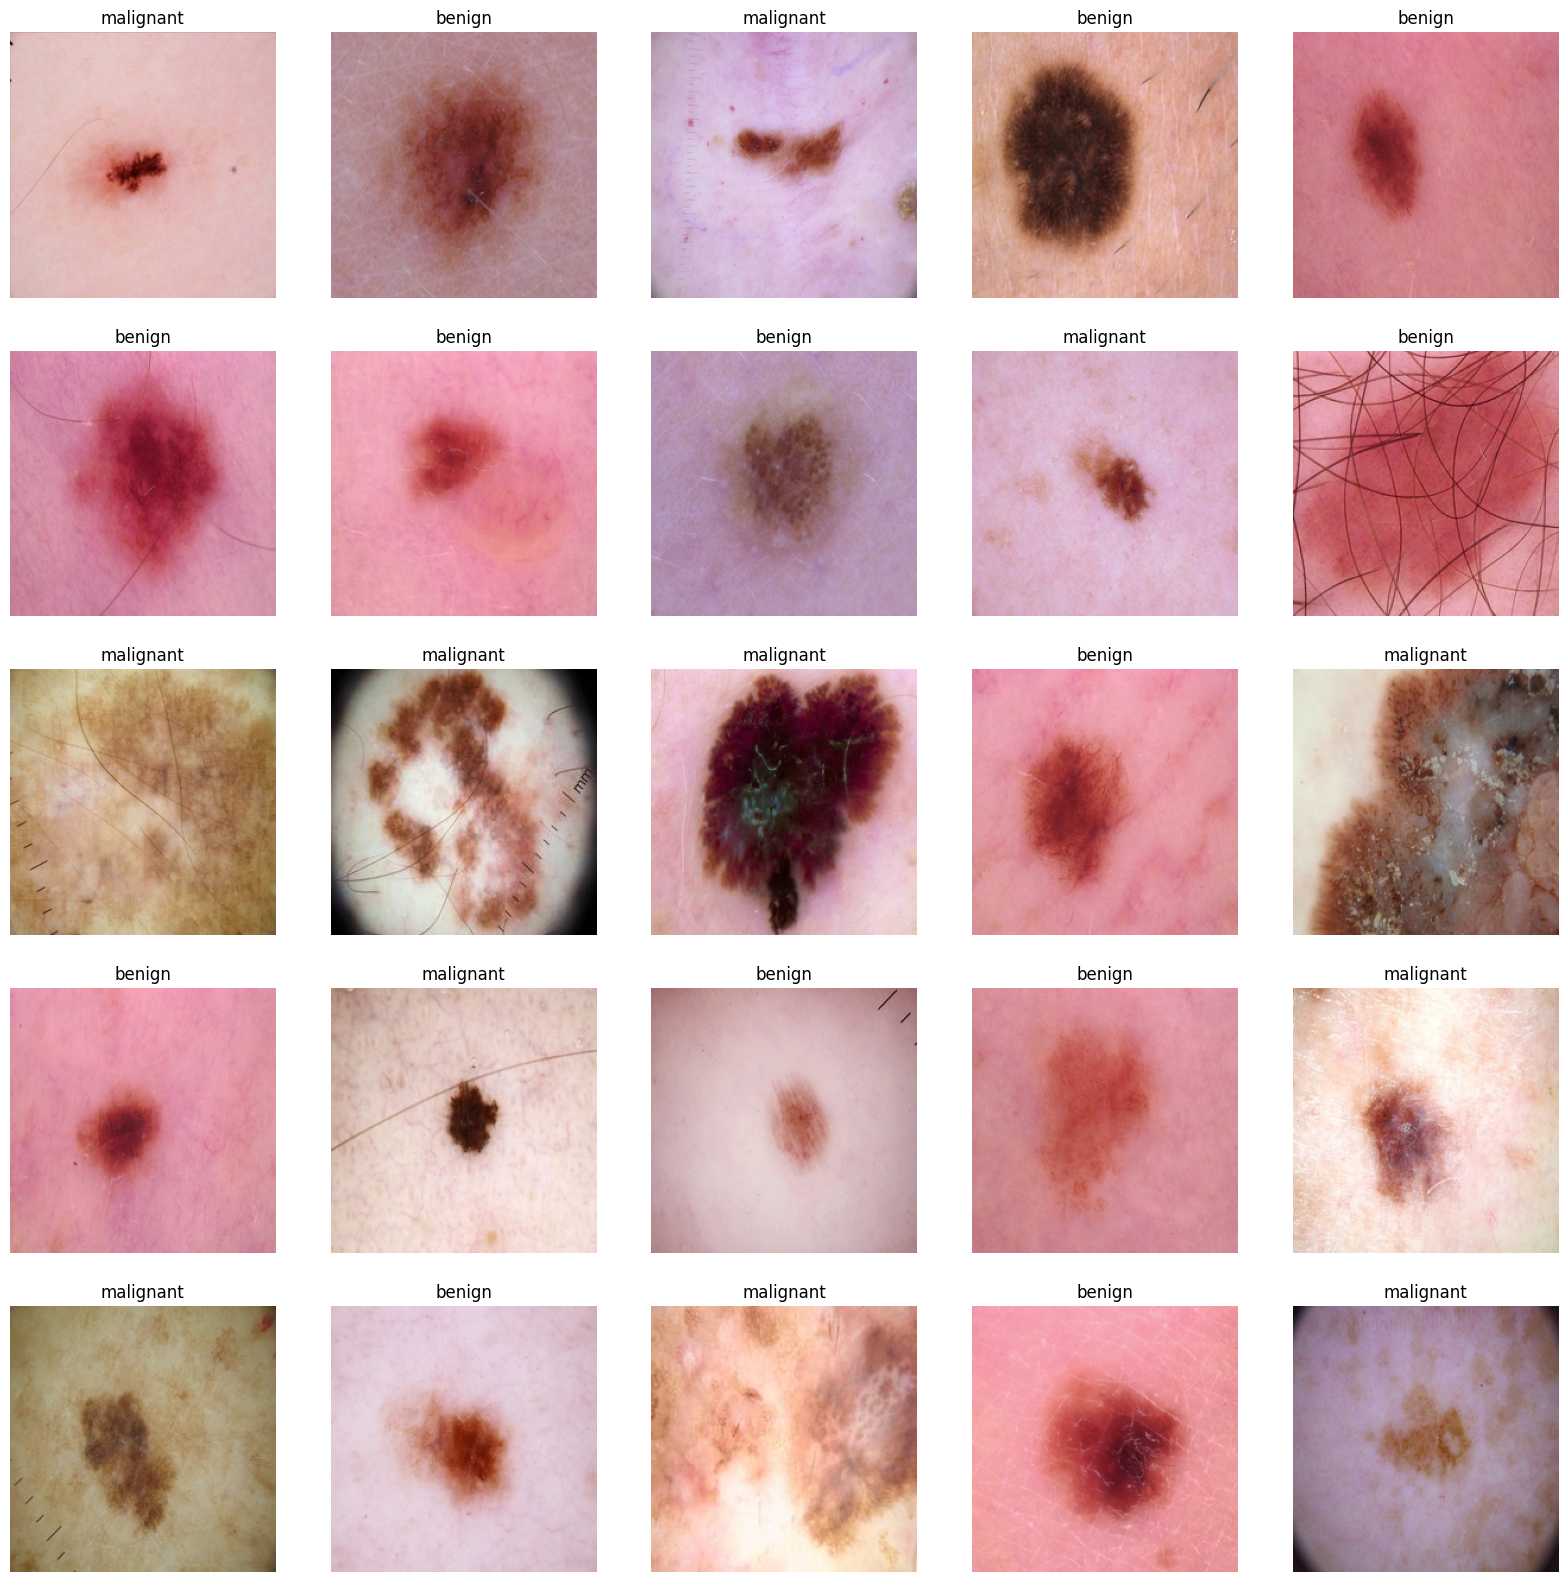

In [27]:
#Prediction Results

model.eval()

plt.figure(figsize=(20,20))
for i, images in enumerate(pred_files):
    # just want 25 images to print
    if i > 24:
      break
    img = Image.open(images)
    index = pred_class(img)
    plt.subplot(5,5,i+1)
    plt.title(class_names[index])
    plt.axis('off')
    plt.imshow(img)